# A Willshaw Network for Novelty Detection

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import imageProc as pr
from scipy.stats import linregress
import willshaw as wl

In [2]:
plotFolder = "plots/willshawNovelty/"

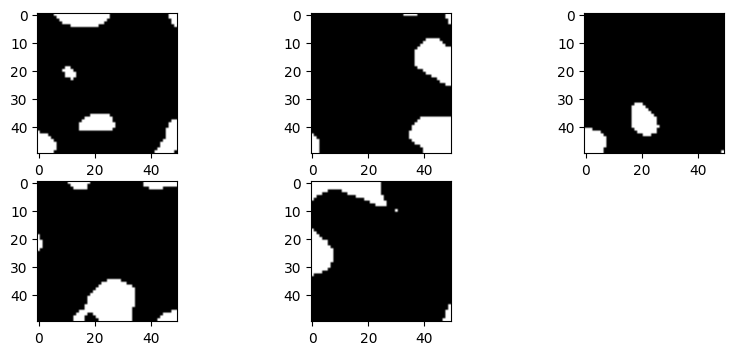

In [3]:
n_images = 5
picsize = 50 #square image
Xim = pr.sparse_images(picsize,n_images,show=True,seed=15)
plt.savefig(plotFolder+"V_images.png",dpi=300,bbox_inches='tight')

Learn the images using a Willshaw rule

In [4]:
#linearized images
X = np.reshape(Xim,[-1,n_images])

In [5]:
w = wl.learn_w(X) 

Output of the network as a measure of novelty?

In [6]:
wl.y(X[:,0],w)

0.0

Compute actual novelty:

 $$\min_i \Big[\sum_{x} (I(x) - V_i(x))^2\Big] $$

Generate arbitrary images and compute novelty as well as network output.

In [7]:
n_random = 200
XrandomIm = pr.sparse_images(picsize,n_random,maxit = 10000,seed=1)

In [8]:
#linearized images
Xrandom = np.reshape(XrandomIm,[-1,n_random])

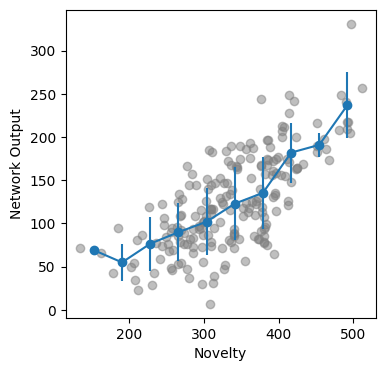

In [9]:
fig, ax = plt.subplots(figsize = (4,4))
wl.output_novelty(X,Xrandom,w,plot=True,scatter=True,ax=ax);
ax.set_xlabel("Novelty");
ax.set_ylabel("Network Output");
plt.savefig(plotFolder+"output_vs_novelty.png",dpi=300,bbox_inches='tight')

Distort images with noise and compare output as a function of the distortion.

In [10]:
k = 10 #percentage of synapses modified

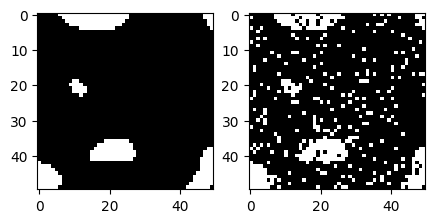

In [11]:
fig,ax = plt.subplots(1,2,figsize = (5,4))
ax[0].imshow((Xim[:,:,0]), cmap='gray');
XimDist = wl.distort(Xim[:,:,0], k)
ax[1].imshow(XimDist, cmap='gray');
plt.savefig(plotFolder+"distorted_image.png",dpi=300,bbox_inches='tight')

In [12]:
XDist = np.reshape(XimDist,[-1,1])

In [13]:
wl.y(XDist,w)

array([142.])

In [14]:
ks = np.arange(0,50,5)
ys = np.zeros(np.shape(ks))
novelties = np.zeros(np.shape(ks))
for i,k in enumerate(ks):
    XimDist = wl.distort(Xim[:,:,0], k)
    XDist = np.reshape(XimDist,[-1,1])
    ys[i] = wl.y(XDist,w)
    novelties[i] = wl.novelty(X,XDist)

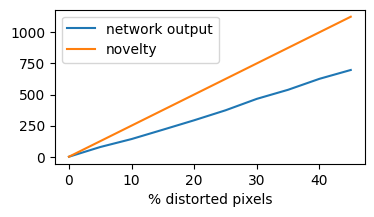

In [15]:
fig,ax = plt.subplots(1,1,figsize = (4,2))
ax.plot(ks,ys,'-');
ax.plot(ks,novelties,'-');
ax.set_xlabel("% distorted pixels");
ax.legend(["network output", "novelty"]);
plt.savefig(plotFolder+"output_vs_distortion.png",dpi=300,bbox_inches='tight')

Show that distortion within the bright pixels is irrelevant. 

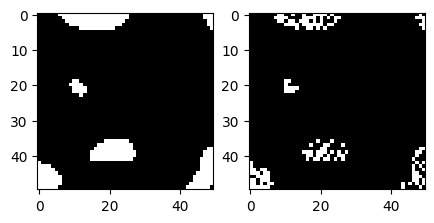

In [16]:
fig,ax = plt.subplots(1,2,figsize = (5,4))
ax[0].imshow((Xim[:,:,0]), cmap='gray');
XimDist = wl.distort_by_color(Xim[:,:,0], k)
ax[1].imshow(XimDist, cmap='gray');
plt.savefig(plotFolder+"distorted_image_onlyW.png",dpi=300,bbox_inches='tight')

In [17]:
XDist = np.reshape(XimDist,[-1,1])

In [18]:
wl.y(XDist,w)

array([0.])

In [19]:
ks = np.arange(0,50,5)
ys = np.zeros(np.shape(ks))
novelties = np.zeros(np.shape(ks))
for i,k in enumerate(ks):
    XimDist = wl.distort_by_color(Xim[:,:,0], k)
    XDist = np.reshape(XimDist,[-1,1])
    ys[i] = wl.y(XDist,w)
    novelties[i] = wl.novelty(X,XDist)

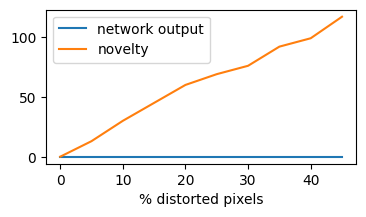

In [20]:
fig,ax = plt.subplots(1,1,figsize = (4,2))
ax.plot(ks,ys,'-');
ax.plot(ks,novelties,'-');
ax.set_xlabel("% distorted pixels");
ax.legend(["network output", "novelty"]);
plt.savefig(plotFolder+"output_vs_white_distortion.png",dpi=300,bbox_inches='tight')

How many images can the network store? We can check this by plotting the mean network output vs. novelty curve for different values of stored images for a given sparsity level. 

In [21]:
maxI = 100
n_random = 200
picsize = 50 #square image
nbins=10
dn = 10

In [22]:
Xim = pr.sparse_images(picsize,maxI,seed=15,maxit = 10000)

In [23]:
XrandomIm = pr.sparse_images(picsize,n_random,maxit = 10000,seed=1)
Xrandom = np.reshape(XrandomIm,[-1,n_random])

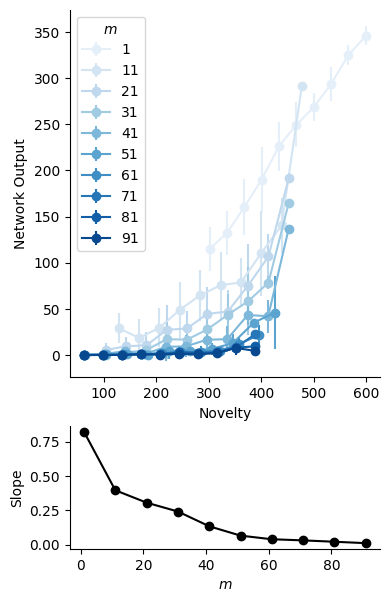

In [24]:
sns.set_palette("Blues",int(maxI/dn));
fig, ax = plt.subplots(2,1,figsize = (4,7),gridspec_kw={'height_ratios': [3, 1]})
n_images_vec = np.arange(1,maxI,dn)
slopes = np.zeros(np.shape(n_images_vec))

for j,n_images in enumerate(n_images_vec):
    
    #linearized images
    X = np.reshape(Xim[:,:,:n_images],[-1,n_images])
    w = wl.learn_w(X)
    
    n,ny,_ = wl.output_novelty(X,Xrandom,w,plot=True,ax=ax[0]);
    slopes[j] = linregress(n,ny).slope

ax[0].legend(np.arange(1,maxI,dn),title="$m$")
ax[0].set_xlabel("Novelty")
ax[0].set_ylabel("Network Output");

ax[1].plot(n_images_vec, slopes, 'ko-')
ax[1].set_xlabel("$m$")
ax[1].set_ylabel("Slope");
sns.despine();
plt.savefig(plotFolder+"output_vs_novelty_vs_N.png",dpi=300,bbox_inches='tight')

How does the slope vary with sparsity?

In [25]:
sparsities = np.arange(0.7,1.0,0.05)
slopes = np.zeros([len(sparsities), len(n_images_vec)])
n_images_vec = np.arange(1,maxI,dn)

In [26]:
for i,s in enumerate(sparsities):
    Xim = pr.sparse_images(picsize,maxI,seed=15,maxit = 10000,sparsity=s)
    XrandomIm = pr.sparse_images(picsize,n_random,maxit = 10000,seed=1,sparsity=s)
    Xrandom = np.reshape(XrandomIm,[-1,n_random])
    for j,n_images in enumerate(n_images_vec):
        #linearized images
        X = np.reshape(Xim[:,:,:n_images],[-1,n_images])
        w = wl.learn_w(X)

        n,ny,_ = wl.output_novelty(X,Xrandom,w,plot=True,ax=ax[0]);
        slopes[i,j] = linregress(n,ny).slope

increase maxit


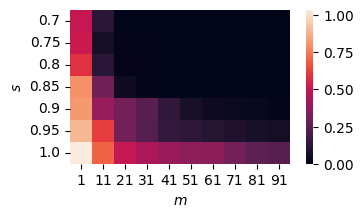

In [30]:
plt.figure(figsize = (4,2))
sns.heatmap(slopes,xticklabels=n_images_vec, yticklabels=np.round(sparsities,2),square=True);
plt.savefig(plotFolder+"heatmap_slope_sparsity_m.png",dpi=300,bbox_inches='tight')
plt.xlabel("$m$")
plt.ylabel("$s$");